In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

In [18]:
# Define the tickers and download historical data
TICKERS = ["TGT", "BNDX"]
PERIOD = "2y"
INTERVAL = "1d"

# Download historical data for the last 2 years
data = yf.download(TICKERS, period=PERIOD, interval=INTERVAL)['Close']

# Compute daily percentage returns
returns = data.pct_change().dropna()

# Compute rolling mean and standard deviation for mean reversion strategy
WINDOW = 20  # Lookback window for mean reversion
zscore = (data - data.rolling(WINDOW).mean()) / data.rolling(WINDOW).std()

# Define trading strategy
long_signal = zscore['BNDX'] < -1   # Buy XLK when z-score is below -1
short_signal = zscore['BNDX'] > 1   # Sell XLK when z-score is above 1

# Positions
positions = pd.DataFrame(index=data.index)
positions['BNDX'] = np.where(long_signal, 1, np.where(short_signal, -1, 0))
positions['TGT'] = -positions['BNDX']  # Short TGT as a hedge

# Calculate strategy returns
strategy_returns = (positions.shift(1) * returns).sum(axis=1)
cumulative_returns = (1 + strategy_returns).cumprod()

[*********************100%***********************]  2 of 2 completed


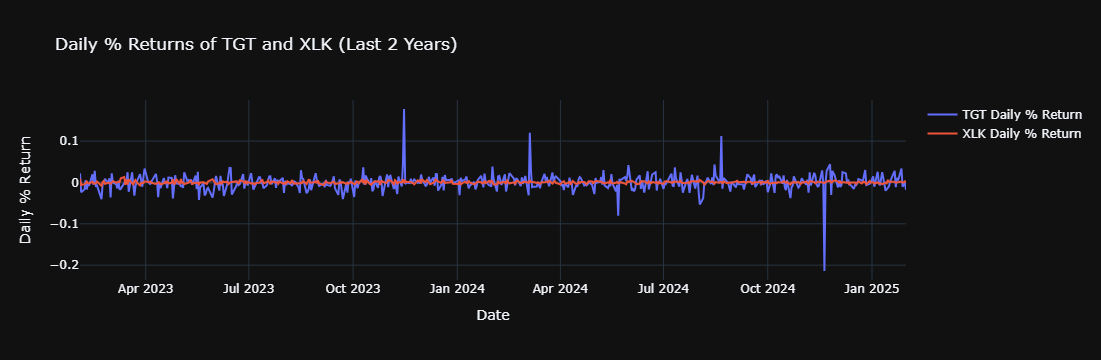

In [20]:
# Plot 1: Daily Percentage Returns of TGT and XLK
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=returns.index, y=returns['TGT'], mode='lines', name='TGT Daily % Return'))
fig1.add_trace(go.Scatter(x=returns.index, y=returns['BNDX'], mode='lines', name='XLK Daily % Return'))
fig1.update_layout(
    title="Daily % Returns of TGT and XLK (Last 2 Years)",
    xaxis_title="Date",
    yaxis_title="Daily % Return",
    template="plotly_dark"
)

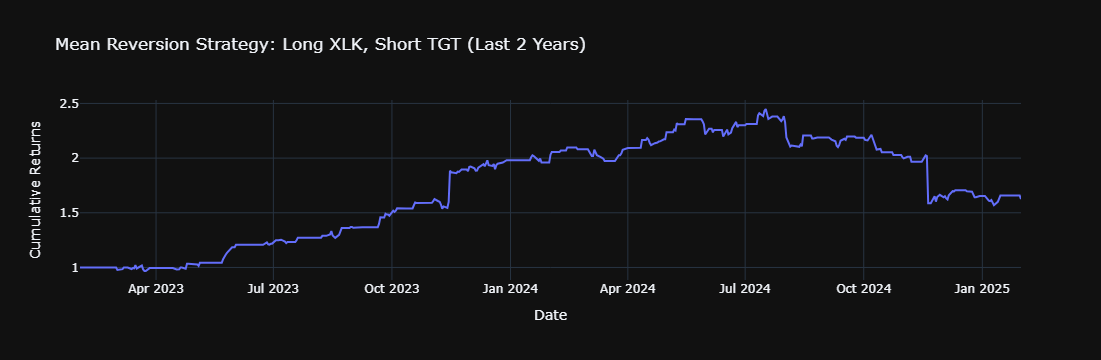

In [22]:
# Plot 1: Cumulative Returns of the Strategy
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns, mode='lines', name='Strategy Cumulative Returns'))
fig2.update_layout(
    title="Mean Reversion Strategy: Long XLK, Short TGT (Last 2 Years)",
    xaxis_title="Date",
    yaxis_title="Cumulative Returns",
    template="plotly_dark"
)